# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA



from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the Data

In [85]:
df=pd.read_csv('/content/drive/MyDrive/T5/week4/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


# **Find the dataset information **

In [4]:
df.info()
#dataset contains float , int and object data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

# **Check the shape of the data**

In [5]:
df.shape
#dataset contain 26 column and 52000 features

(52000, 26)

# **view the the data with various functions**

In [6]:
df.head()#show first five row

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [7]:
df.sample()#show random sampl of the dataset

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
37155,431380.0,405300.0,-1.527923,53.543401,14,3.0,1,1.0,04/04/2007,4,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2007


In [8]:
df.tail()#show last five row in the dataset

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51999,454710.0,185430.0,-1.212104,51.565050,43,3.0,3,1.0,24/05/2010,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010


# **Perform summary statistics**

In [9]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


# **check for null and duplicated:**

In [10]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [11]:
df.duplicated().sum()

43

there maybe outlier in some columns

most acciednet that are recorded are less sever which could influnce the analysis and be biased

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

# **remove duplicated**

In [86]:
df=df.drop_duplicates(keep='first')

In [40]:
df.duplicated().sum()

0

# **Impute missing data**

In [87]:
remove_unknown_other_na=df.columns
for column in remove_unknown_other_na:
    mode_value = df[column].replace(['Unknown', 'na', 'Other'], pd.NA).mode()[0]
    df[column] = df[column].replace(['Unknown', 'na', 'Other'], mode_value).fillna(mode_value)

In [42]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


# **Remove the outliers**

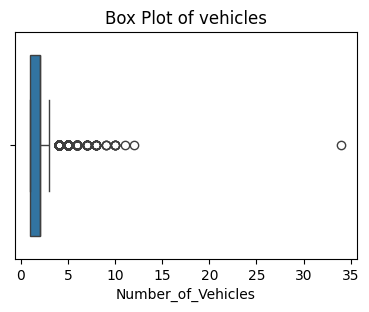

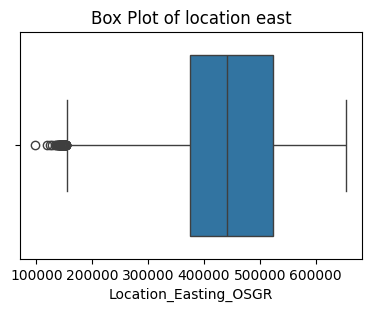

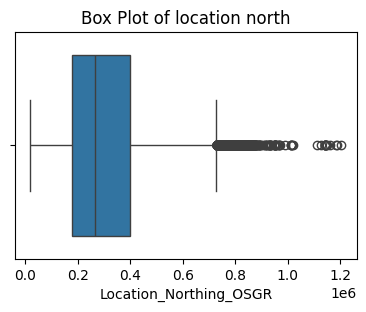

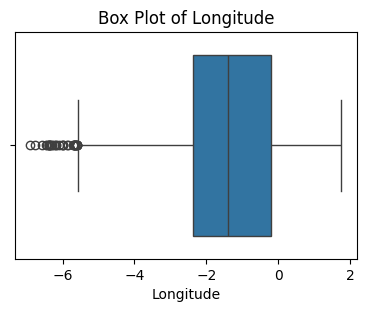

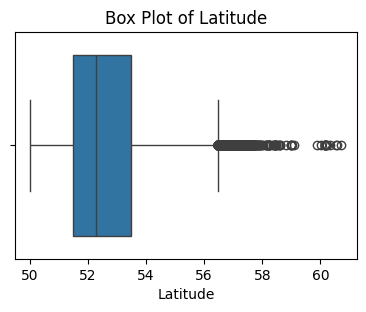

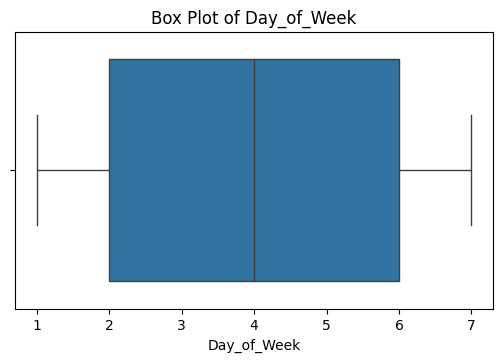

In [60]:


plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Number_of_Vehicles'])
plt.title('Box Plot of vehicles')

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Location_Easting_OSGR'])
plt.title('Box Plot of location east')

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Location_Northing_OSGR'])
plt.title('Box Plot of location north')


plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Longitude'])
plt.title('Box Plot of Longitude')

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Latitude'])
plt.title('Box Plot of Latitude')

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Day_of_Week'])
plt.title('Box Plot of Day_of_Week')

plt.tight_layout()
plt.show()

In [61]:
def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def remove_outlier_all_columns(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        df = remove_outlier(df, column)
    return df

df = remove_outlier_all_columns(df)

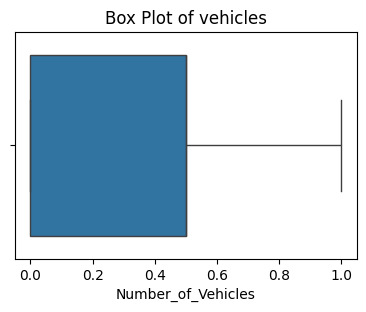

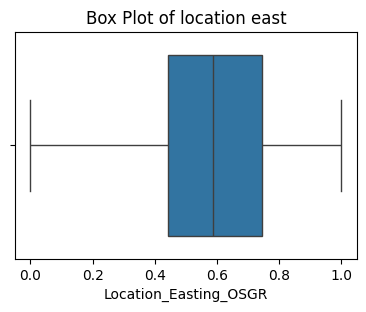

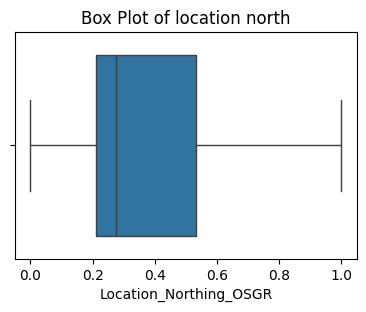

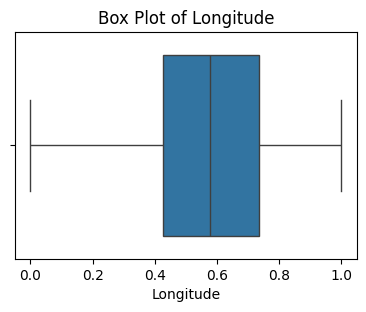

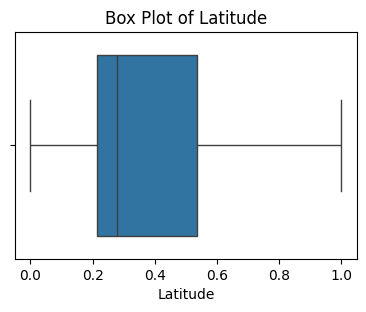

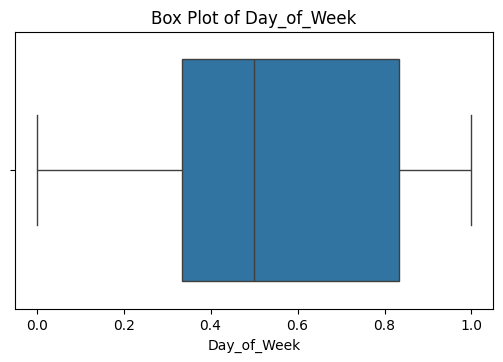

In [56]:


plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Number_of_Vehicles'])
plt.title('Box Plot of vehicles')

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Location_Easting_OSGR'])
plt.title('Box Plot of location east')

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Location_Northing_OSGR'])
plt.title('Box Plot of location north')


plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Longitude'])
plt.title('Box Plot of Longitude')

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Latitude'])
plt.title('Box Plot of Latitude')

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Day_of_Week'])
plt.title('Box Plot of Day_of_Week')

plt.tight_layout()
plt.show()

# **Implement One-Hot Encoding for nominal categorical variables.**

In [88]:
df=pd.get_dummies(df,drop_first=True)#convert caticorical to numircal using encoding

# **Scale the data**

In [89]:
scaler = MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)#scale the data

In [64]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Did_Police_Officer_Attend_Scene_of_Accident_Yes
0,0.702509,0.224621,0.690936,0.228384,0.000000,0.0,0.5,0.0,0.000000,0.026624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.701223,0.575602,0.700952,0.577461,0.154639,0.0,0.0,0.0,0.666667,0.241747,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.474013,0.384457,0.461564,0.389100,0.195876,0.0,0.5,0.0,0.500000,0.325879,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.528438,0.567417,0.518714,0.571031,0.123711,0.0,0.5,0.0,0.666667,0.215122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.595964,0.391283,0.586784,0.395421,0.329897,0.0,0.5,0.0,0.833333,0.386581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14129,0.386631,0.575095,0.369229,0.578428,0.030928,0.0,0.0,0.0,0.666667,0.083067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14130,0.462707,0.516963,0.449613,0.520914,0.051546,0.0,0.5,0.0,1.000000,0.115016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14131,0.450525,0.269754,0.437956,0.274942,0.536082,0.0,1.0,0.0,0.666667,0.662407,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14132,0.785565,0.210898,0.773630,0.213246,0.000000,0.0,0.5,0.0,1.000000,0.018104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [91]:
df_geo=df[['Location_Easting_OSGR','Location_Northing_OSGR' ,'Longitude' ,'Latitude' , 'Accident_Severity' ,'Number_of_Vehicles' , 'Number_of_Casualties' ,'Day_of_Week']]#choose columnt thar are relevent for analysis geographical location and accident data

In [92]:
df_geo.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week
0,0.830308,0.071670,0.829304,0.073596,1.0,0.000000,0.00,0.833333
1,0.737457,0.141906,0.747459,0.144705,1.0,0.030303,0.00,0.000000
2,0.388118,0.126681,0.423616,0.129905,1.0,0.030303,0.00,0.500000
3,0.437069,0.328559,0.464044,0.331396,1.0,0.000000,0.02,1.000000
4,0.517553,0.279406,0.542525,0.282705,1.0,0.030303,0.02,0.333333


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

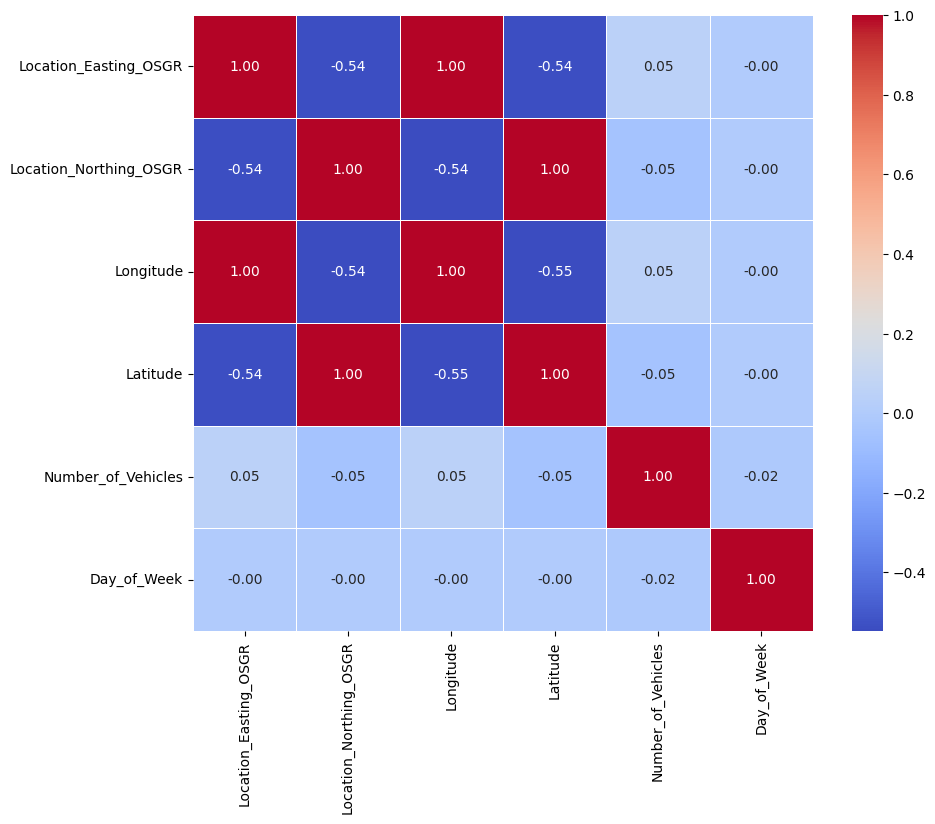

In [81]:
corr_matrix=df[['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Number_of_Vehicles','Day_of_Week']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

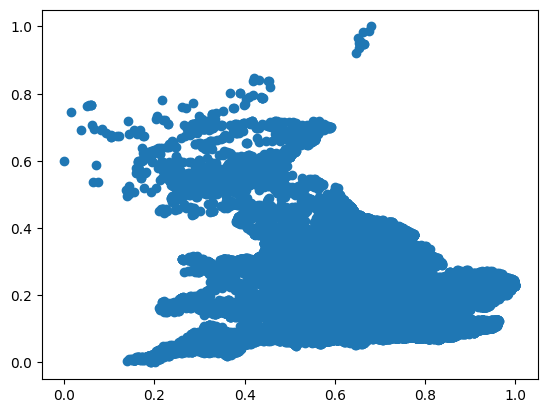

In [93]:
plt.scatter(df['Longitude'] ,df['Latitude'] )

# **Reduce dimentions using PCA**

In [94]:
# Mean
X_mean = df.mean()
X_std = df.std()
Z = (df - X_mean) / X_std
Z.dropna(inplace=True)

pca= PCA(n_components=2).fit(Z)
redu_df = pca.transform(Z)
redu_df.shape

(51957, 2)

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

## Evaluation
Evaluate the clustering result using appropriate metrics.


## Plot the data points with their predicted cluster center

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?